In [15]:
#import dependencies
import pandas as pd
import numpy as np
import re
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as smt

pd.set_option('max_colwidth', 400)

In [8]:
#creating new csv for Mai's research question
new_wp_mentalhealth_df = pd.read_csv("Resources/cleaned_workplace_mental_health.csv")

#drop unneeded columns

mai_df = new_wp_mentalhealth_df.drop(['Timestamp', 'Country', '# of Employees', 'Help Resources',
                                     'Mental Health Consequence', 'Physical Health Consequence',
                                     'Mental Health Interview', 'Physical Health Interview',
                                     'Mental v. Physical','Unnamed: 0'],axis=1)
mai_df.to_csv('Resources/FamilyHis_vs_SeekingHelp.csv')

In [9]:
#creating new csv for mai's research question
#do individual with history of mental illness in the family more likely to reachout for help?

mai_df.head()


,Age,Gender,Family History,Seeks Treatment,Have Benefits,Care Options,Wellness Programs,Anonymity
0,37.0,Female,No,Yes,Yes,Not sure,No,Yes
1,44.0,Male,No,No,Don't know,No,Don't know,Don't know
2,32.0,Male,No,No,No,No,No,Don't know
3,31.0,Male,Yes,Yes,No,Yes,No,No
4,31.0,Male,No,No,Yes,No,Don't know,Don't know


/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


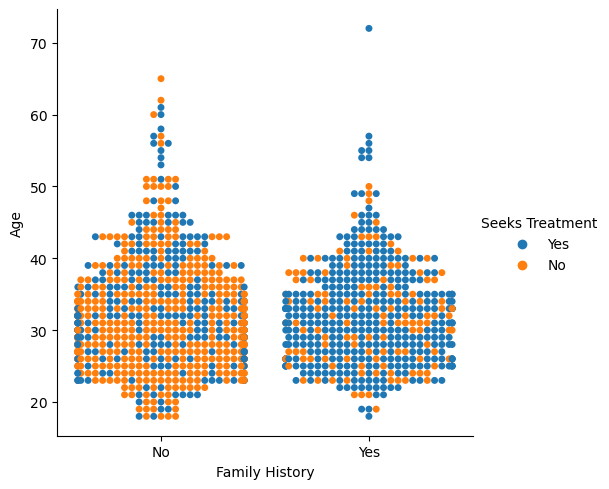

In [11]:
#scatter plot familyhis vs seaking treament

sns.catplot(data=mai_df, x="Family History", y=("Age"), hue = "Seeks Treatment" , kind ="swarm")

Seeks Treatment   No  Yes
Family History           
No               495  272
Yes              127  365


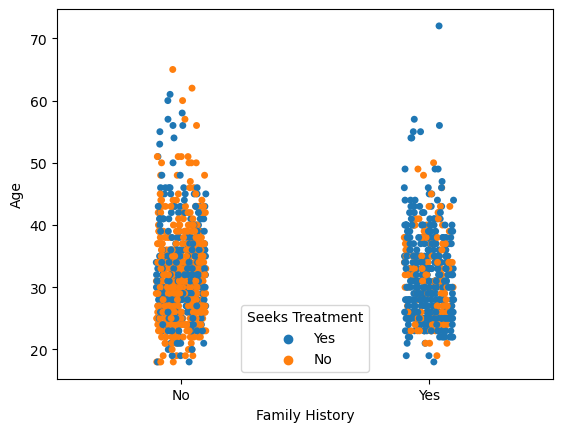

In [21]:
sns.stripplot(data=mai_df, x="Family History", y=("Age"), hue = "Seeks Treatment")

mai_df1 = mai_df[["Family History", "Seeks Treatment"]]
table = sm.stats.Table.from_data(mai_df1)
print(table.table_orig)


In [13]:
#sns.stripplot(data=mai_df, x="Gender", y="Anonymity", hue = "Seeks Treatment")

-------------------
Seeks Treatment   No  Yes
Gender                   
Female            77  171
Male             541  446
Other              4   20
-------------------
df          2
pvalue      9.96647209206003e-13
statistic   55.26870128808481


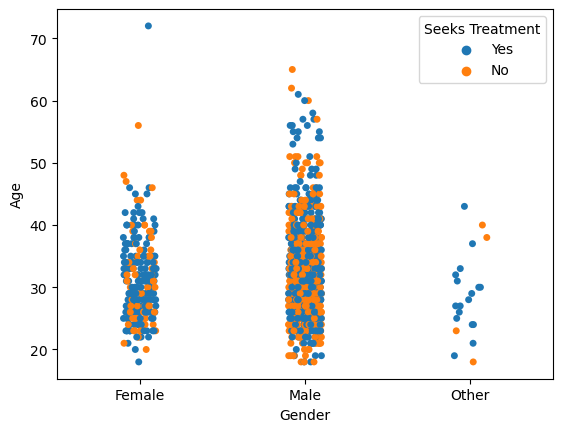

In [22]:
#sns.catplot(data=mai_df, x="Gender", y=("Age"), hue = "Seeks Treatment" , kind ="swarm")
sns.stripplot(data=mai_df, x="Gender", y=("Age"), hue = "Seeks Treatment")

print("-------------------")


mai_df2 = mai_df[["Gender", "Seeks Treatment"]]
table2 = sm.stats.Table.from_data(mai_df2)
res2 =  table2.test_nominal_association()
print(table2.table_orig)
print("-------------------")
print(" ")
print (res2)

In [26]:
mai_df3 = mai_df[["Seeks Treatment", "Anonymity"]]
table3 = sm.stats.Table.from_data(mai_df3)
print(table3.table_orig)

Anonymity        Don't know  No  Yes
Seeks Treatment                     
No                      448  27  147
Yes                     371  38  228


In [27]:
res3 =  table3.test_nominal_association()
print(table3.table_orig)
print("-------------------")
print (res3)

Anonymity        Don't know  No  Yes
Seeks Treatment                     
No                      448  27  147
Yes                     371  38  228
-------------------
df          2
pvalue      1.8304549906922318e-06
statistic   26.42189198645524


-------------------
Anonymity       Don't know  No  Yes
Family History                     
No                     520  33  214
Yes                    299  32  161
-------------------
df          2
pvalue      0.024381708706719074
statistic   7.427844141946347


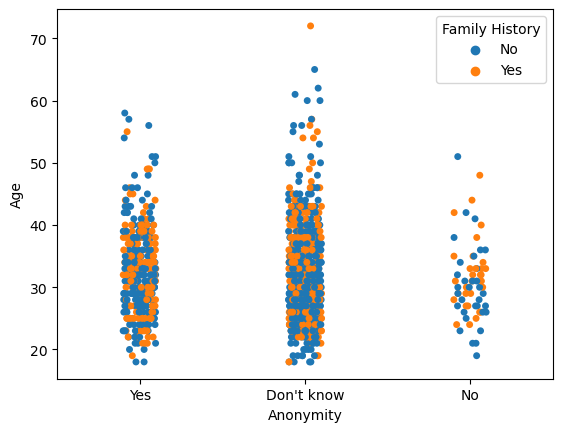

In [24]:
sns.stripplot(data=mai_df, x="Anonymity", y=("Age"), hue = "Family History")

print("-------------------")


mai_df4 = mai_df[["Family History", "Anonymity"]]
table4 = sm.stats.Table.from_data(mai_df4)
res4 =  table4.test_nominal_association()
print(table4.table_orig)
print("-------------------")
print (res4)